In [1]:
import pandas as pd

df = pd.read_csv('uber.csv')


In [2]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [3]:
df.dropna(inplace=True)  # or use df.fillna(value)


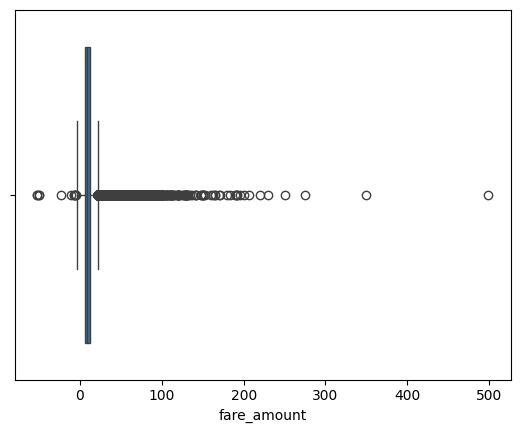

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=df['fare_amount'])
plt.show()


In [5]:
Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['fare_amount'] >= (Q1 - 1.5 * IQR)) & (df['fare_amount'] <= (Q3 + 1.5 * IQR))]


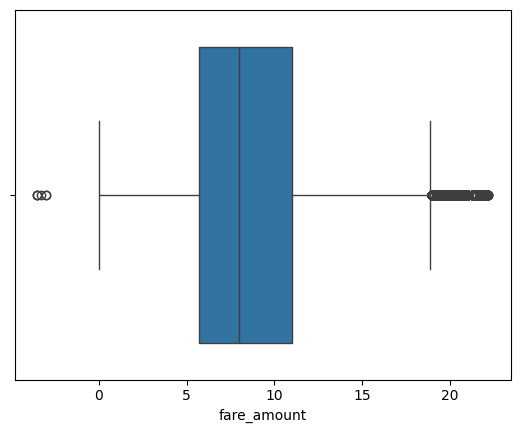

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=df['fare_amount'])
plt.show()

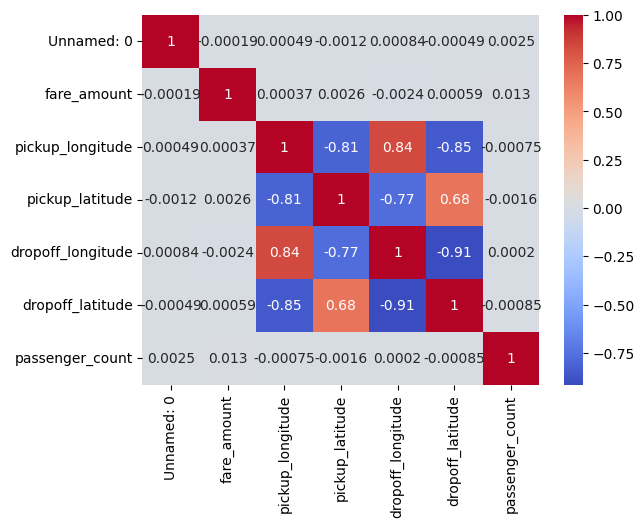

In [7]:
correlation_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

# Convert pickup_datetime to datetime and extract features
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_day'] = df['pickup_datetime'].dt.dayofweek
df['pickup_month'] = df['pickup_datetime'].dt.month

# Drop the original datetime column and other non-numeric columns
X = df.drop(['fare_amount', 'key', 'pickup_datetime', 'Unnamed: 0'], axis=1)
y = df['fare_amount']

# Ensure all columns are numeric
print("X columns:", X.columns.tolist())
print("X dtypes:\n", X.dtypes)
print("\nNon-numeric columns:", X.select_dtypes(exclude=['number']).columns.tolist())

# Convert any remaining non-numeric columns to numeric or drop them
X = X.select_dtypes(include=['number'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X columns: ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'pickup_hour', 'pickup_day', 'pickup_month']
X dtypes:
 pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
pickup_hour            int32
pickup_day             int32
pickup_month           int32
dtype: object

Non-numeric columns: []


In [13]:
from sklearn.linear_model import LinearRegression

# Verify that X_train contains only numeric data
print("X_train shape:", X_train.shape)
print("X_train dtypes:\n", X_train.dtypes)
print("\nNon-numeric columns in X_train:", X_train.select_dtypes(exclude=['number']).columns.tolist())

# Ensure X_train is numeric
if X_train.select_dtypes(exclude=['number']).shape[1] > 0:
    print("Warning: Non-numeric columns found! Please re-run Cell 8.")
    X_train = X_train.select_dtypes(include=['number'])

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


X_train shape: (146266, 8)
X_train dtypes:
 pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
pickup_hour            int32
pickup_day             int32
pickup_month           int32
dtype: object

Non-numeric columns in X_train: []


LinearRegression()

In [15]:
from sklearn.ensemble import RandomForestRegressor
import time

print("Starting Random Forest training...")
print(f"Training data shape: {X_train.shape}")
print("This may take a few minutes...\n")

# Optimized Random Forest with faster parameters
rf_model = RandomForestRegressor(
    n_estimators=50,           # Reduced from 100 for faster training
    max_depth=20,              # Limit tree depth to prevent overfitting and speed up
    max_samples=0.8,           # Use 80% of data for each tree (faster)
    n_jobs=-1,                 # Use all available CPU cores
    random_state=42,
    verbose=1                  # Show progress
)

start_time = time.time()
rf_model.fit(X_train, y_train)
end_time = time.time()

print(f"\nTraining completed in {end_time - start_time:.2f} seconds")
print(f"Number of trees: {len(rf_model.estimators_)}")


Starting Random Forest training...
Training data shape: (146266, 8)
This may take a few minutes...



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.0s



Training completed in 3.02 seconds
Number of trees: 50


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.9s finished


In [16]:
from sklearn.metrics import mean_squared_error, r2_score

linear_predictions = linear_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)


[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done  50 out of  50 | elapsed:    0.0s finished


In [17]:
linear_rmse = mean_squared_error(y_test, linear_predictions, squared=False)
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)

linear_r2 = r2_score(y_test, linear_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print(f"Linear Regression RMSE: {linear_rmse}, R2: {linear_r2}")
print(f"Random Forest RMSE: {rf_rmse}, R2: {rf_r2}")


Linear Regression RMSE: 4.1352872245574135, R2: 0.0007292644644488755
Random Forest RMSE: 2.294478655333228, R2: 0.6923620891449611


e:\Anaconda\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
e:\Anaconda\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


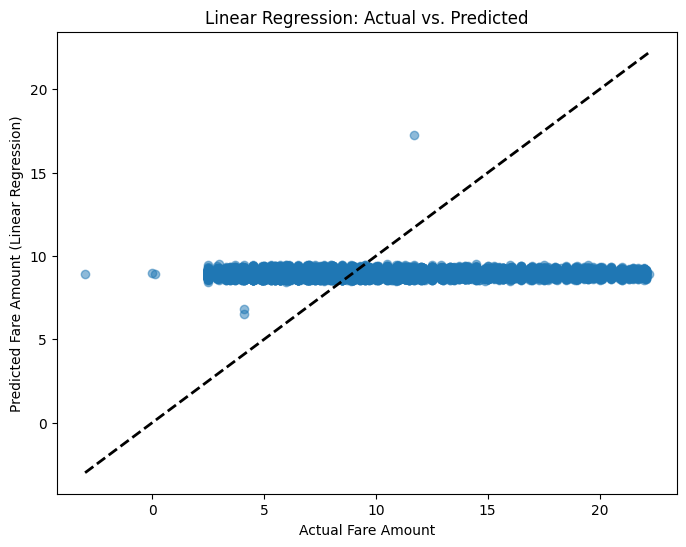

In [18]:
import matplotlib.pyplot as plt

# Assuming you have already trained the models and made predictions as in your code
# linear_predictions and rf_predictions contain the predictions from the two models

# Create a scatter plot of actual vs. predicted values for Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, linear_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for reference
plt.xlabel("Actual Fare Amount")
plt.ylabel("Predicted Fare Amount (Linear Regression)")
plt.title("Linear Regression: Actual vs. Predicted")
plt.show()



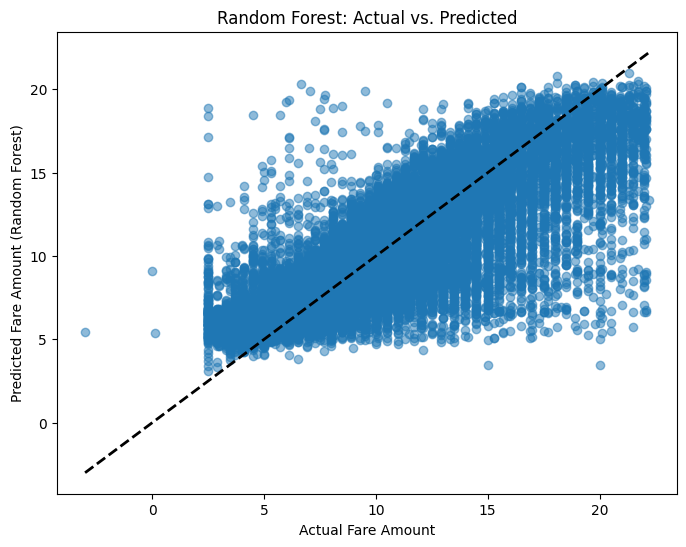

In [19]:
# Create a scatter plot of actual vs. predicted values for Random Forest
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for reference
plt.xlabel("Actual Fare Amount")
plt.ylabel("Predicted Fare Amount (Random Forest)")
plt.title("Random Forest: Actual vs. Predicted")
plt.show()